In [ ]:
#######################################Xception#####################################################

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.optimizers import Adam


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]='0'
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

image_data_gen = tf.keras.preprocessing.image.ImageDataGenerator()


Num GPUs Available:  0


In [3]:
train_path = "C:/Users/shubh/OneDrive/Desktop/IITP/Expeeriment Set3/train"
test_path =  "C:/Users/shubh/OneDrive/Desktop/IITP/Expeeriment Set3/On_Off"


In [4]:
training_set = image_data_gen.flow_from_directory(
    directory=train_path,
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=16,
    shuffle=True
)


Found 1300 images belonging to 130 classes.


In [5]:
test_set = image_data_gen.flow_from_directory(
    directory=test_path,
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=16
)

Found 260 images belonging to 130 classes.


In [6]:
input = tf.keras.layers.Input(shape=(256, 256, 3))
x = tf.keras.applications.xception.preprocess_input(input)
base_model = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(256, 256, 3),
    pooling=None
)

output = base_model(x)
output = Flatten()(output)
output = Dense(130, activation='softmax')(output)
model = tf.keras.Model(inputs=input, outputs=output)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide (TrueDivide)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract (Subtract)                  │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 8, 8, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 130)                 │      17,039,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,900,970 (144.58 MB)

 Trainable params: 37,846,442 (144.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [7]:
num_epochs = 20
checkpoint_filepath = "./checkpoint.keras"
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=10, min_lr=0.000001, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor="val_accuracy", save_best_only=True, save_weights_only=False)
]
history = model.fit(
    training_set,
    epochs=num_epochs,
    callbacks=callbacks
)

Epoch 1/20


C:\Users\shubh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 548s 6s/step - accuracy: 0.0157 - loss: 5.0236 - learning_rate: 1.0000e-04
Epoch 2/20


C:\Users\shubh\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
C:\Users\shubh\anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
C:\Users\shubh\anaconda3\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


82/82 ━━━━━━━━━━━━━━━━━━━━ 517s 6s/step - accuracy: 0.0422 - loss: 4.7593 - learning_rate: 1.0000e-04
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 524s 6s/step - accuracy: 0.4776 - loss: 2.3082 - learning_rate: 1.0000e-04
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 530s 6s/step - accuracy: 0.9580 - loss: 0.2034 - learning_rate: 1.0000e-04
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 535s 7s/step - accuracy: 0.9827 - loss: 0.0565 - learning_rate: 1.0000e-04
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 529s 6s/step - accuracy: 0.9894 - loss: 0.0474 - learning_rate: 1.0000e-04
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 531s 6s/step - accuracy: 0.9899 - loss: 0.0250 - learning_rate: 1.0000e-04
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 531s 6s/step - accuracy: 0.9941 - loss: 0.0203 - learning_rate: 1.0000e-04
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 530s 6s/step - accuracy: 0.9945 - loss: 0.0146 - learning_rate: 1.0000e-04
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 530s 6s/step - accuracy: 0.9907 - loss: 0.0174 - learning_rate: 1.00

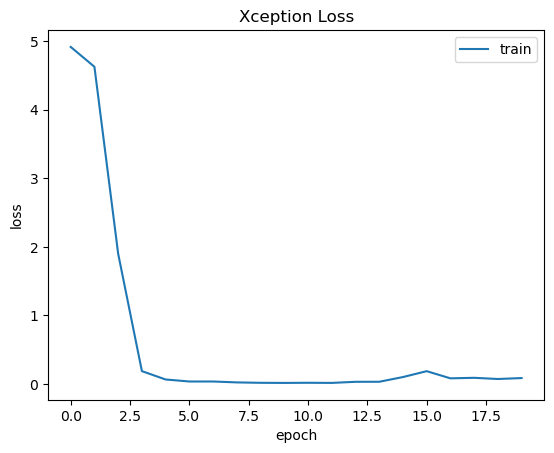

In [8]:
plt.plot(history.history['loss'])
plt.title('Xception Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.savefig('./loss.png')
plt.show()
plt.close()

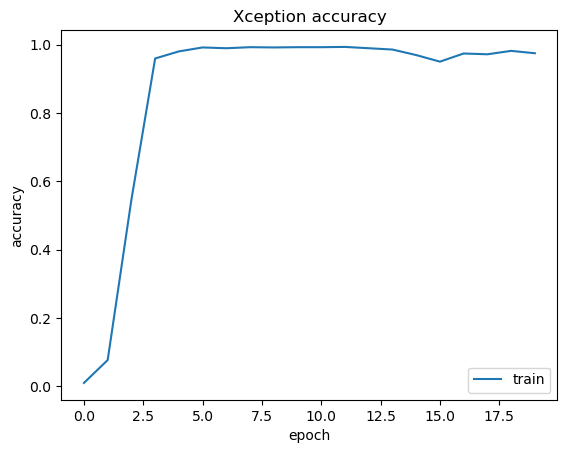

In [9]:
plt.plot(history.history['accuracy'])
plt.title('Xception accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.savefig('./accuracy.png')
plt.show()
plt.close()

In [10]:
# model.load_weights(checkpoint_filepath)
_, accuracy = model.evaluate(test_set)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")
with open('./results.txt', 'a') as f:
    f.write(f"Test accuracy: {round(accuracy * 100, 2)}%.\n")


17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.0585 - loss: 11.4592
Test accuracy: 4.23%
